# Modeling and Evaluation

### Objectives

- Answer business requirement 2:
    - The client is interested to tell whether a given x-ray image contains a fractured bone or not.

### Inputs
- inputs/fracture_dataset/bone_fracture/bone_fracture/train
- inputs/fracture_dataset/bone_fracture/bone_fracture/val
- inputs/fracture_dataset/bone_fracture/bone_fracture/test
- image shape embeddings

### Outputs
- Images distribution plot in train, validation, and test set
- Image augmentation
- Class indices to change prediction inference in labels
- Machine learning model creation and training
- Save model
- Learning curve plot for model performance
- Model evaluation on pickle file
- Prediction on the random image file

---

# Set Data Directory

### Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

### Set Working Directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Bone-Fracture-Detection/jupyter_notebooks'

In [4]:
os.chdir('/workspace/Bone-Fracture-Detection')

In [5]:
work_dir = os.getcwd()
work_dir

'/workspace/Bone-Fracture-Detection'

### Set input directories

In [6]:
parent_path = 'inputs/fracture_dataset/bone_fracture/bone_fracture'
train_path = parent_path + '/train'
val_path = parent_path + '/val'
test_path = parent_path + '/test'

### Set output directories

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
	print('Old version is already available create a new version.')
	pass
else:
	os.makedirs(name = file_path)

Old version is already available create a new version.


### Set labels

In [8]:
labels = os.listdir(train_path)
print('Project Labels: ', labels)

Project Labels:  ['fractured', 'unfractured']


### Set image shape

In [9]:
import joblib


version = 'v1'
image_shape = joblib.load(filename=f'outputs/{version}/image_shape.pkl')
image_shape

(290, 273, 3)

---

# Amount of images in train, test and val data

* train - fractured: 4593 images
* train - unfractured: 4625 images
* val - fractured: 336 images
* val - unfractured: 490 images
* test - fractured: 237 images
* test - unfractured: 267 images


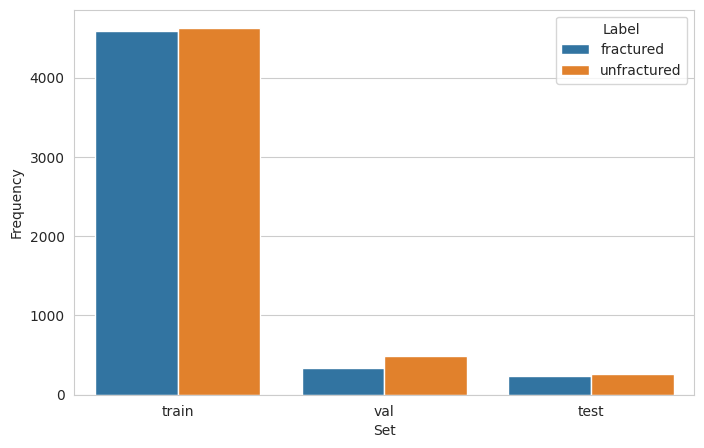

In [14]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'val', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency': int(len(os.listdir(parent_path + '/' + folder + '/' + label)))}
                  ),
                  ignore_index=True)
    print(f"* {folder} - {label}: {len(os.listdir(parent_path + '/' + folder + '/' + label))} images")

plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---